# Exercícios 

Utilize os arquivos do **RECLAME AQUI** e crie um dashboard com algumas caracteristicas. 

Empresas: 
- Hapvida
- Nagem
- Ibyte

O painel deve conter tais informações: 

1. Série temporal do número de reclamações. 

2. Frequência de reclamações por estado. 

3. Frequência de cada tipo de **STATUS**

4. Distribuição do tamanho do texto (coluna **DESCRIÇÃO**) 


Alguns botões devem ser implementados no painel para operar filtros dinâmicos. Alguns exemplos:: 

1. Seletor da empresa para ser analisada. 

2. Seletor do estado. 

3. Seletor por **STATUS**

4. Seletor de tamanho do texto 

Faça o deploy da aplicação. Dicas: 

https://www.youtube.com/watch?v=vw0I8i7QJRk&list=PLRFQn2r6xhgcDMhp9NCWMqDYGfeeYsn5m&index=16&t=252s

https://www.youtube.com/watch?v=HKoOBiAaHGg&t=515s

Exemplo do github
https://github.com/jlb-gmail/streamlit_teste


**OBSERVAÇÃO**

A resposta do exercicio é o link do github e o link da aplicação. Coloque-os abaixo.  





In [1]:
!pip install plotly.express


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import streamlit as st
import datetime
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#https://drive.google.com/file/d/1Fb-vBVdWTS7689IuUviQzszQBzrzqzr7/view?usp=drive_link

df_hap=pd.read_csv('RECLAMEAQUI_HAPVIDA.csv')
df_hap.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS
0,149490335,TEMPO DE ATENDIMENTO,Recife - PE,2022-01-09,Demora na execução<->Plano<->Planos de Saúde<-...,Não respondida,Acabei de sair de uma urgência por causa de at...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
1,149499817,Hapvida não tem nutrólogo,Salvador - BA,2022-01-09,Planos de saúde<->Qualidade do serviço prestad...,Não respondida,O Hapvida diz que fornece o serviço de nutrólo...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
2,149498293,Descaso de tratamento de Hemodiálise,Olinda - PE,2022-01-09,"Demora para autorização de consultas, exames e...",Respondida,"Meu irmão Wagner Santiago, estava internado de...",https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
3,149495455,DESORGANIZAÇÃO E FALTA DE RESOLUÇÃO DE PROBLEMA,Goiânia - GO,2022-01-09,Demora na execução<->Planos de saúde<->Planos ...,Não respondida,Agendei pelo chat um procedimento onde fui bem...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
4,149495285,Liberação de Procedimento,Fortaleza - CE,2022-01-09,Planos de saúde<->Planos de Saúde<->Hapvida Sa...,Respondida,Paguei fatura do plano em atraso e tal atraso ...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66


In [5]:
df_ibyte=pd.read_csv('RECLAMEAQUI_IBYTE.csv')
df_ibyte.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS
0,21898349,Quebraram a tela do meu Notebook,Hidrolândia - CE,2016-02-11,Ibyte - Loja Física<->Informática,Resolvido,Em 05/10/2016 deixei meu Notebook para consert...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,2,11,42,6,3,1,1
1,22581481,Solicitação de Cancelamento de Compra,Araxá - MG,2016-03-12,Não consigo fazer operação por telefone<->Cana...,Em réplica,"Prezados, efetuei uma compra no site www.ameri...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2
2,22579385,Inutilizarão a tela do meu notebook,Fortaleza - CE,2016-03-12,Problemas na Loja<->Ibyte - Loja Física<->Prod...,Respondida,Decidi conserta meu notebook que parou de inic...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2
3,21328791,Produto não faz o que vendedor informa!,Fortaleza - CE,2016-04-10,Ibyte - Loja Física<->Impressoras<->Produto er...,Em réplica,Venho através desde canal de reclamação expor ...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,4,10,101,14,6,2,1
4,22608043,Ibyte não troca o produto,Fortaleza - CE,2016-05-12,Smartphone<->Celulares e Smartphones<->Blackfr...,Respondida,Comprei um celular na black Friday e com 4 dia...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,5,12,133,19,3,2,2


In [6]:
df_nagem=pd.read_csv('RECLAMEAQUI_NAGEM.csv')
df_nagem.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS
0,27859289,Seguro Nagem celular é uma [Editado pelo Recla...,Fortaleza - CE,2017-01-08,Nagem - Loja Física<->Problemas com o Atendimento,Não resolvido,Comprei um celular LG na loja NAGEM do shoppin...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,8,8,1,6,1,1
1,28562465,Demora na finalização da venda / Mau atendimento,Recife - PE,2017-01-09,Nagem - Loja Física,Resolvido,"Fui na loja Nagem do Shopping Recife, fiz uma ...",https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,9,9,2,0,1,1
2,29249337,Problemas com a troca de produto,Salvador - BA,2017-01-10,Nagem - Loja Física,Respondida,Comprei um celular da Samsung J5 prime no sába...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,10,10,2,1,1,1
3,29999183,Produto com defeito/desrespeito com o consumidor,Olinda - PE,2017-01-11,Nagem - Loja Física,Respondida,No dia 25 /10 /2017 realizei uma compra de um ...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,11,11,2,2,1,1
4,30812099,Descaso Comsumidor,Salvador - BA,2017-01-12,TV<->Blackfriday<->Tela trincada<->Eletroeletr...,Não resolvido,"Na sexta feira do dia 24/11/2017,fui efetuar u...",https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,12,12,2,3,1,1


In [7]:
df_hap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1016 non-null   int64 
 1   TEMA           1016 non-null   object
 2   LOCAL          1016 non-null   object
 3   TEMPO          1016 non-null   object
 4   CATEGORIA      1016 non-null   object
 5   STATUS         1016 non-null   object
 6   DESCRICAO      1016 non-null   object
 7   URL            1016 non-null   object
 8   ANO            1016 non-null   int64 
 9   MES            1016 non-null   int64 
 10  DIA            1016 non-null   int64 
 11  DIA_DO_ANO     1016 non-null   int64 
 12  SEMANA_DO_ANO  1016 non-null   int64 
 13  DIA_DA_SEMANA  1016 non-null   int64 
 14  TRIMETRES      1016 non-null   int64 
 15  CASOS          1016 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 127.1+ KB


In [8]:
df_hap['TEMPO']=pd.to_datetime(df_hap['TEMPO'])
df_ibyte['TEMPO']=pd.to_datetime(df_ibyte['TEMPO'])
df_nagem['TEMPO']=pd.to_datetime(df_nagem['TEMPO'])

In [9]:
df_hap['STATUS'].value_counts()

#df_ibyte['ANO'].value_counts()

#df_nagem['ANO'].value_counts()

STATUS
Não respondida    639
Respondida        271
Resolvido          67
Em réplica         36
Não resolvido       3
Name: count, dtype: int64

(array([0.36 , 0.   , 0.31 , 0.   , 0.392, 0.   , 0.4  , 0.   , 0.294,
        0.244]),
 array([2017. , 2017.5, 2018. , 2018.5, 2019. , 2019.5, 2020. , 2020.5,
        2021. , 2021.5, 2022. ]),
 <BarContainer object of 10 artists>)

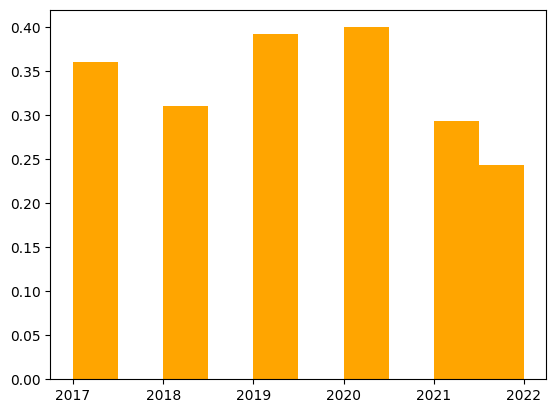

In [10]:
fig1=plt.hist(df_nagem['ANO'],density=True, color='orange')
fig1

<Axes: xlabel='TEMPO'>

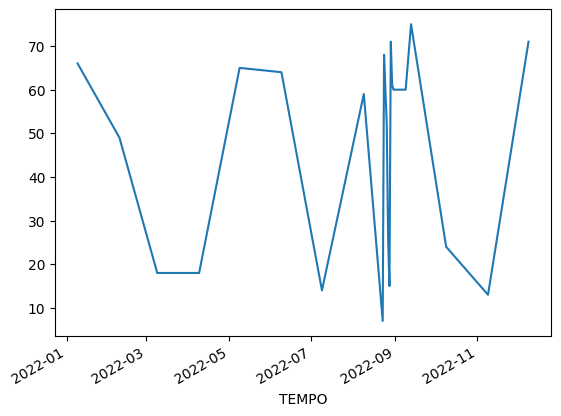

In [11]:
df_hap.groupby('TEMPO').nunique()['ID'].plot()

<Axes: xlabel='TEMPO'>

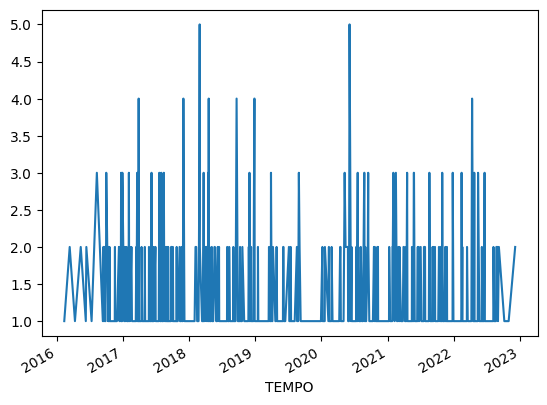

In [12]:
df_ibyte.groupby('TEMPO').nunique()['ID'].plot()

<Axes: xlabel='TEMPO'>

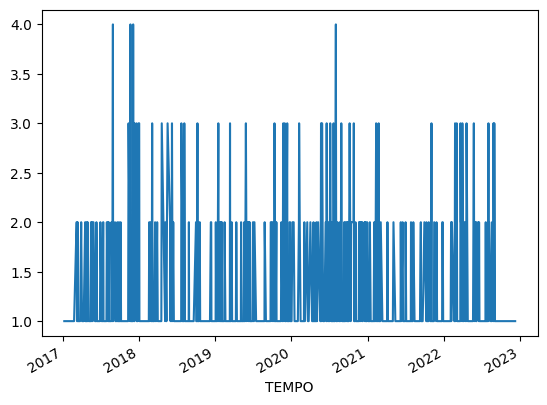

In [13]:
df_nagem.groupby('TEMPO').nunique()['ID'].plot()

In [14]:
df_hap.STATUS.value_counts()

STATUS
Não respondida    639
Respondida        271
Resolvido          67
Em réplica         36
Não resolvido       3
Name: count, dtype: int64

In [15]:
df_ibyte.STATUS.value_counts()

STATUS
Resolvido         430
Respondida        339
Em réplica        124
Não resolvido     103
Não respondida      4
Name: count, dtype: int64

In [16]:
df_nagem.STATUS.value_counts()

STATUS
Respondida        440
Resolvido         238
Em réplica        174
Não resolvido     147
Não respondida      1
Name: count, dtype: int64

In [17]:
df_nagem.STATUS.value_counts()

STATUS
Respondida        440
Resolvido         238
Em réplica        174
Não resolvido     147
Não respondida      1
Name: count, dtype: int64

In [18]:
df_hap['UF'] = df_hap['LOCAL'].str[-2:]
df_ibyte['UF'] = df_ibyte['LOCAL'].str[-2:]
df_nagem['UF'] = df_nagem['LOCAL'].str[-2:]

In [48]:
df_hap['LOCAL'].value_counts()

LOCAL
Fortaleza - CE                 157
Salvador - BA                  105
Recife - PE                     83
Goiânia - GO                    53
Natal - RN                      32
                              ... 
Andradina - SP                   1
Sorriso - MT                     1
Aracati - CE                     1
Catu - BA                        1
Vitória de Santo Antão - PE      1
Name: count, Length: 179, dtype: int64

In [20]:
df_ibyte['UF'].value_counts()

UF
CE    622
PE     97
RN     62
MA     46
PI     43
SP     30
PB     22
PA     22
RJ     10
MG      8
DF      7
BA      6
PR      4
 C      4
RS      3
GO      3
AP      2
MT      2
ta      2
AM      2
--      1
SE      1
 P      1
Name: count, dtype: int64

In [21]:
df_nagem['UF'].value_counts()

UF
PE    393
CE    179
BA    156
SE     54
PB     44
PA     39
RN     31
MA     28
SP     28
PI     15
AL     14
RJ      6
MG      4
DF      4
SC      1
ta      1
AM      1
RR      1
AP      1
Name: count, dtype: int64

In [22]:
df_hap['UF'].unique()

array(['PE', 'BA', 'GO', 'CE', 'SP', 'MA', 'PA', 'AL', 'RN', 'PB', '--',
       'MS', 'ES', 'AM', 'MT', 'SE', 'MG', 'RS', 'RR', 'RJ', 'SC', 'PI',
       'TO', 'DF'], dtype=object)

<Axes: xlabel='TEMPO'>

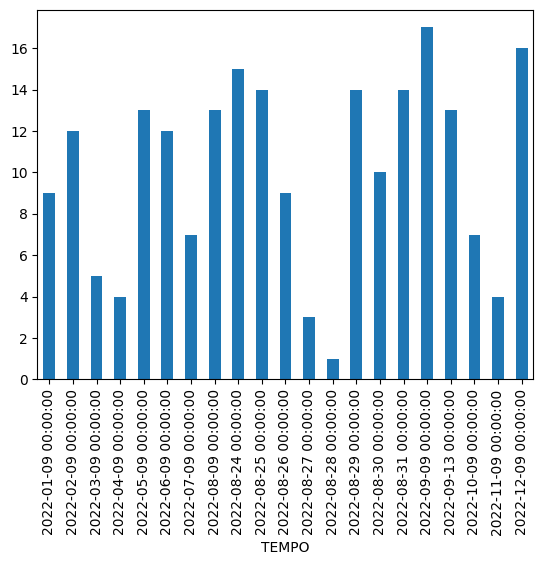

In [23]:
df_hap[df_hap['UF']=='CE'].groupby('TEMPO').nunique()['ID'].plot(kind='bar')

<Axes: xlabel='TEMPO'>

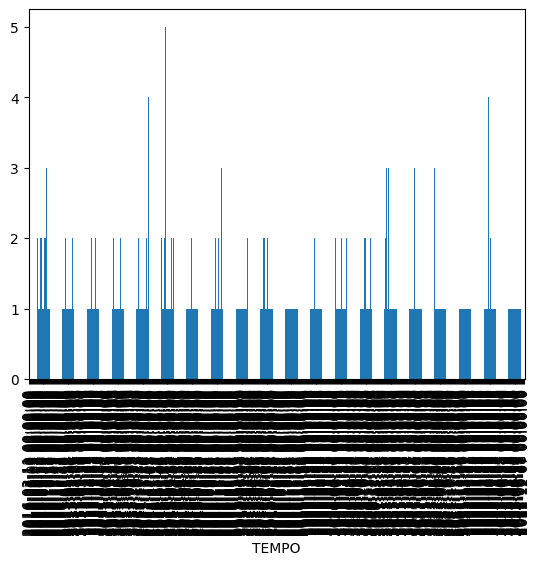

In [24]:
df_ibyte[df_ibyte['UF']=='CE'].groupby('TEMPO').nunique()['ID'].plot(kind='bar')

<Axes: xlabel='TEMPO'>

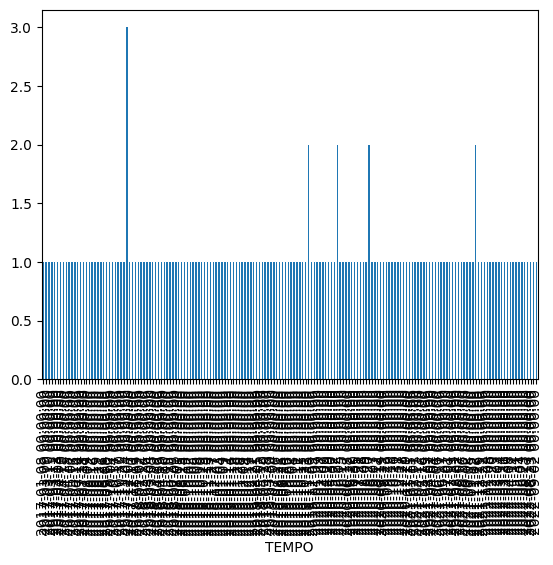

In [25]:
df_nagem[df_nagem['UF']=='CE'].groupby('TEMPO').nunique()['ID'].plot(kind='bar')

In [26]:
local='CE'

hap_local=(df_hap['UF']=='CE').sum()

hap_local

#hap_local=df_hap[df_hap['UF']==local].count()
#ibyte_local=df_ibyte[df_ibyte['UF']==local].count()
#nagem_local=df_nagem[df_nagem['UF']==local].count()

#print(hap_local, ibyte_local, nagem_local)

212

In [27]:
!pip install streamlit
!pip install plotly



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:

df_ibyte['STATUS'].unique()

array(['Resolvido', 'Em réplica', 'Respondida', 'Não resolvido',
       'Não respondida'], dtype=object)

In [29]:
df_hap['STATUS'].unique()

array(['Não respondida', 'Respondida', 'Resolvido', 'Em réplica',
       'Não resolvido'], dtype=object)

In [30]:
df_hap.sum()

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'

In [ ]:
df_hap.value_counts()

ID         TEMA                                                                                                  LOCAL                         TEMPO       CATEGORIA                                                                                                      STATUS          DESCRICAO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
df_hap.count()

ID               1016
TEMA             1016
LOCAL            1016
TEMPO            1016
CATEGORIA        1016
STATUS           1016
DESCRICAO        1016
URL              1016
ANO              1016
MES              1016
DIA              1016
DIA_DO_ANO       1016
SEMANA_DO_ANO    1016
DIA_DA_SEMANA    1016
TRIMETRES        1016
CASOS            1016
UF               1016
dtype: int64

In [ ]:
df_hap.len()

AttributeError: 'DataFrame' object has no attribute 'len'

In [ ]:
df_hap.__len__


<bound method DataFrame.__len__ of              ID                                             TEMA  \
0     149490335                            TEMPO DE ATENDIMENTO    
1     149499817                       Hapvida não tem nutrólogo    
2     149498293             Descaso de tratamento de Hemodiálise   
3     149495455  DESORGANIZAÇÃO E FALTA DE RESOLUÇÃO DE PROBLEMA   
4     149495285                       Liberação de Procedimento    
...         ...                                              ...   
1011  150005391                                 Mal atendimento    
1012  150004057                        Agenda médica nunca abre    
1013  150000291                             Péssimo atendimento    
1014  150019173                      Imagem dos exames realizado   
1015  150001141                            Demora no atendimento   

                LOCAL      TEMPO  \
0         Recife - PE 2022-01-09   
1       Salvador - BA 2022-01-09   
2         Olinda - PE 2022-01-09   
3   

In [40]:
df_nagem['STATUS'].value_counts()

STATUS
Respondida        440
Resolvido         238
Em réplica        174
Não resolvido     147
Não respondida      1
Name: count, dtype: int64

In [47]:
    
local='CE'
status='Respondida'
ano=2020


df_local=df_nagem[df_nagem['UF']==local]
df_status=df_local[df_local['STATUS']==status]
df_ano=df_status[df_status['ANO']==ano]
qtd_nagem=int(len(df_ano))
        
# if df_ano['UF'].sum()==0:
#     qtd_nagem=0
# else:
#     qtd_nagem=df_ano['UF'].sum()

        # col1.metric(label="reclamações - Nagem", value=qtd_nagem)
        # st.markdown('---')
        # fig_nagem=px.bar(df_ano, x='STATUS', y='TEMPO', labels={'Ocorrências - Nagem - ','ANO'},title='Reclamações - NAGEM')
        # st.plotly_chart(fig_nagem)
                
print(qtd_nagem)

19
